<a href="https://colab.research.google.com/github/Geringer13/Netology_pyda/blob/master/Machine_learning_AUC_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve
import seaborn as sns


In [0]:
data = pd.read_csv('adult.csv')

In [68]:
data.head()

,age,workclass,fnlwgt,education,educational,marital,occupation,relationship,race,gender,gain,loss,hours,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [0]:
data.columns=('age', 'workclass', 'fnlwgt', 'education', 'educational', 
              'marital', 'occupation', 'relationship', 'race', 'gender', 'gain', 'loss', 'hours', 'country', 'income')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [28]:
print(data['workclass'].unique())
print(data['education'].unique())
print(data['marital'].unique())
print(data['occupation'].unique())
print(data['relationship'].unique())
print(data['race'].unique())
print(data['gender'].unique())
print(data['country'].unique())
print(data['income'].unique())

['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
['Male' 'Female']
['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' '

In [47]:
data.head()

,age,workclass,fnlwgt,education,educational,marital,occupation,relationship,race,gender,gain,loss,hours,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**Посчитаем и нарисуем график AUC CURVE для логистической регрессии**

In [0]:
y1 = data['income']
x1 = data.drop(['income'], axis=1)

In [64]:
y1.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

In [82]:
x1.head()

,workclass,education,marital,occupation,relationship,race,gender,country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States


In [0]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [0]:
ft = ohe.fit(data[['workclass', 'education', 'marital', 'occupation', 'relationship', 'race', 'gender', 'country']])

In [88]:
x1 = data[['age', 'fnlwgt', 'educational', 'gain', 'loss', 'hours']]
x1.head()

,age,fnlwgt,educational,gain,loss,hours
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [90]:
le.fit(data['income'] )
y1 = pd.Series(data = le.transform(data['income']))
y1.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [92]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

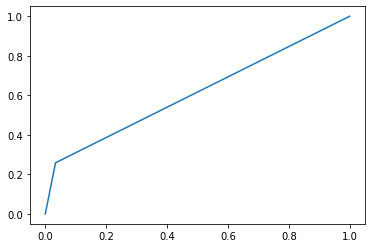

In [95]:
predictions = model.predict(X_test)
fpr, tpr, thres = roc_curve( y_test, predictions)
plt.plot( fpr, tpr )

In [96]:
roc_auc_score(y_test, predictions)

0.6125117240383074

**Посчитаем и нарисуем график AUC CURVE для линейной регрессии**

In [0]:
lin = LinearRegression()
lin_mod = lin.fit(X_train, y_train)

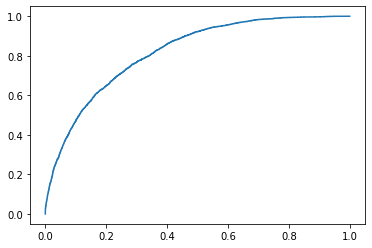

In [114]:
predictions_lin = lin.predict(X_test)
fpr, tpr, thres = roc_curve(y_test, predictions_lin)
plt.plot( fpr, tpr )

In [115]:
roc_auc_score(y_test, predictions_lin)

0.8180183400072639

**Посчитаем и нарисуем график AUC CURVE для деревьев решений**

In [126]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

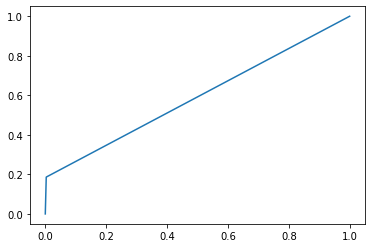

In [129]:
tree_pred = clf.predict(X_test)
fpr, tpr, thres = roc_curve(y_test, tree_pred)
plt.plot( fpr, tpr )

In [130]:
roc_auc_score(y_test, tree_pred)

0.5916001137125688